In [3]:
import tensorflow as tf
import json
import numpy as np

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [7]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [8]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [9]:
train_images.as_numpy_iterator().next()

array([[[4.31372561e-02, 0.00000000e+00, 0.00000000e+00],
        [4.31372561e-02, 0.00000000e+00, 0.00000000e+00],
        [4.70588244e-02, 0.00000000e+00, 0.00000000e+00],
        ...,
        [6.66666701e-02, 7.84313772e-03, 0.00000000e+00],
        [6.53799027e-02, 6.55637262e-03, 0.00000000e+00],
        [6.12132363e-02, 4.84068645e-03, 0.00000000e+00]],

       [[4.70588244e-02, 0.00000000e+00, 0.00000000e+00],
        [5.09803928e-02, 0.00000000e+00, 0.00000000e+00],
        [4.41789217e-02, 0.00000000e+00, 0.00000000e+00],
        ...,
        [7.00980425e-02, 1.12745101e-02, 0.00000000e+00],
        [6.66666701e-02, 7.84313772e-03, 0.00000000e+00],
        [6.81372583e-02, 9.31372587e-03, 0.00000000e+00]],

       [[4.57720570e-02, 0.00000000e+00, 0.00000000e+00],
        [5.44117652e-02, 0.00000000e+00, 0.00000000e+00],
        [5.09803928e-02, 0.00000000e+00, 0.00000000e+00],
        ...,
        [6.71568662e-02, 8.33333377e-03, 0.00000000e+00],
        [6.71568662e-02, 8.33

In [10]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [11]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [12]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [13]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4258, 0.529 , 0.851 , 1.    ], dtype=float16))

In [15]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3360, 3360, 720, 720, 720, 720)

In [16]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [17]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [18]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [19]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.0738, 0.2742, 0.4922, 0.805 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.3958, 0.2595, 0.915 , 0.7812],
        [0.2979, 0.2278, 0.759 , 0.839 ],
        [0.602 , 0.3818, 1.    , 0.963 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.2534, 0.1619, 0.754 , 0.7812],
        [0.658 , 0.0743, 1.    , 0.6304]], dtype=float16))

In [20]:
data_samples = train.as_numpy_iterator()

In [25]:
import matplotlib.pyplot as plt
import cv2

In [21]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


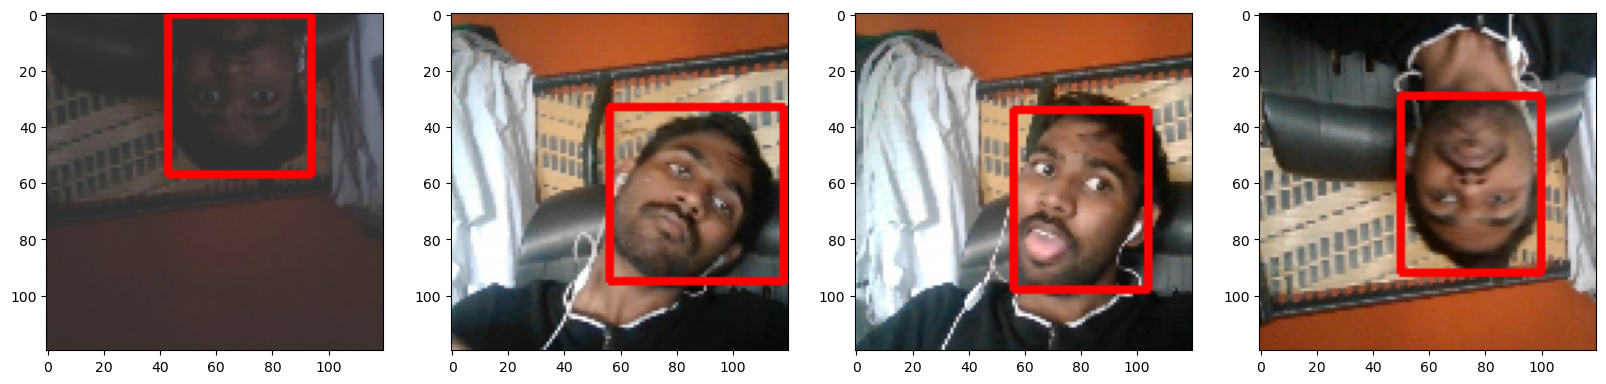

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [29]:
tf.executing_eagerly_outside_functions

AttributeError: module 'tensorflow' has no attribute 'executing_eagerly_outside_functions'

In [30]:
vgg = VGG16(include_top=False)



58889256/58889256 [==============================] - 14s 0us/step


In [31]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [32]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [33]:
facetracker = build_model()

In [34]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [35]:
X, y = train.as_numpy_iterator().next()

In [36]:
X.shape

(8, 120, 120, 3)

In [37]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 524ms/step


In [38]:
classes, coords

(array([[0.684134  ],
        [0.6161617 ],
        [0.45593187],
        [0.63067454],
        [0.62326527],
        [0.57715225],
        [0.619233  ],
        [0.56299293]], dtype=float32),
 array([[0.4542874 , 0.6179323 , 0.46174824, 0.5162299 ],
        [0.5550538 , 0.4222204 , 0.4790547 , 0.672132  ],
        [0.5009231 , 0.50139725, 0.4767721 , 0.51859933],
        [0.5232192 , 0.50230527, 0.4999078 , 0.57802236],
        [0.46924397, 0.49205282, 0.46852192, 0.5293677 ],
        [0.47410673, 0.5196266 , 0.5454748 , 0.5009694 ],
        [0.6004319 , 0.50972396, 0.5302563 , 0.5543126 ],
        [0.43148297, 0.5405601 , 0.543051  , 0.5455457 ]], dtype=float32))

In [39]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [40]:
opt = tf.compat.v1.keras.optimizers.Adam(learning_rate=0.0001)

In [41]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [42]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [43]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.553055>

In [44]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.61575365>

In [45]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [46]:
model = FaceTracker(facetracker)

In [47]:
model.compile(opt, classloss, regressloss)

In [48]:
logdir='logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
420/420 [==============================] - 350s 816ms/step - total_loss: 0.3800 - class_loss: 0.0940 - regress_loss: 0.3329 - val_total_loss: 0.1212 - val_class_loss: 0.0063 - val_regress_loss: 0.1181
Epoch 2/10
420/420 [==============================] - 339s 799ms/step - total_loss: 0.1090 - class_loss: 0.0200 - regress_loss: 0.0990 - val_total_loss: 0.0486 - val_class_loss: 0.0056 - val_regress_loss: 0.0458
Epoch 3/10
420/420 [==============================] - 334s 788ms/step - total_loss: 0.0341 - class_loss: 0.0042 - regress_loss: 0.0320 - val_total_loss: 0.0209 - val_class_loss: 3.1795e-04 - val_regress_loss: 0.0208
Epoch 4/10
420/420 [==============================] - 335s 790ms/step - total_loss: 0.0482 - class_loss: 0.0110 - regress_loss: 0.0427 - val_total_loss: 0.0515 - val_class_loss: 0.0017 - val_regress_loss: 0.0507
Epoch 5/10
420/420 [==============================] - 332s 784ms/step - total_loss: 0.0263 - class_loss: 0.0019 - regress_loss: 0.0254 - val_total_l

In [51]:
hist.history

{'total_loss': [0.07513531297445297,
  0.10136594623327255,
  0.020761234685778618,
  0.018973708152770996,
  0.02174505591392517,
  0.0757860466837883,
  0.026548536494374275,
  0.008315316401422024,
  0.004921406507492065,
  0.008836443535983562],
 'class_loss': [0.007580421399325132,
  0.0005463961279019713,
  0.0002522063732612878,
  0.0005168242496438324,
  0.0014712271513417363,
  0.022934656590223312,
  3.8484060496557504e-05,
  0.00020997936371713877,
  2.3768980099703185e-05,
  5.444755151984282e-05],
 'regress_loss': [0.07134510576725006,
  0.10109274834394455,
  0.020635131746530533,
  0.01871529594063759,
  0.02100944146513939,
  0.0643187165260315,
  0.02652929536998272,
  0.008210326544940472,
  0.004909521900117397,
  0.008809220045804977],
 'val_total_loss': [0.12124328315258026,
  0.04859304800629616,
  0.020909421145915985,
  0.05150863900780678,
  0.06049767881631851,
  0.4561406672000885,
  0.021893441677093506,
  0.036410506814718246,
  0.01644359901547432,
  0.019

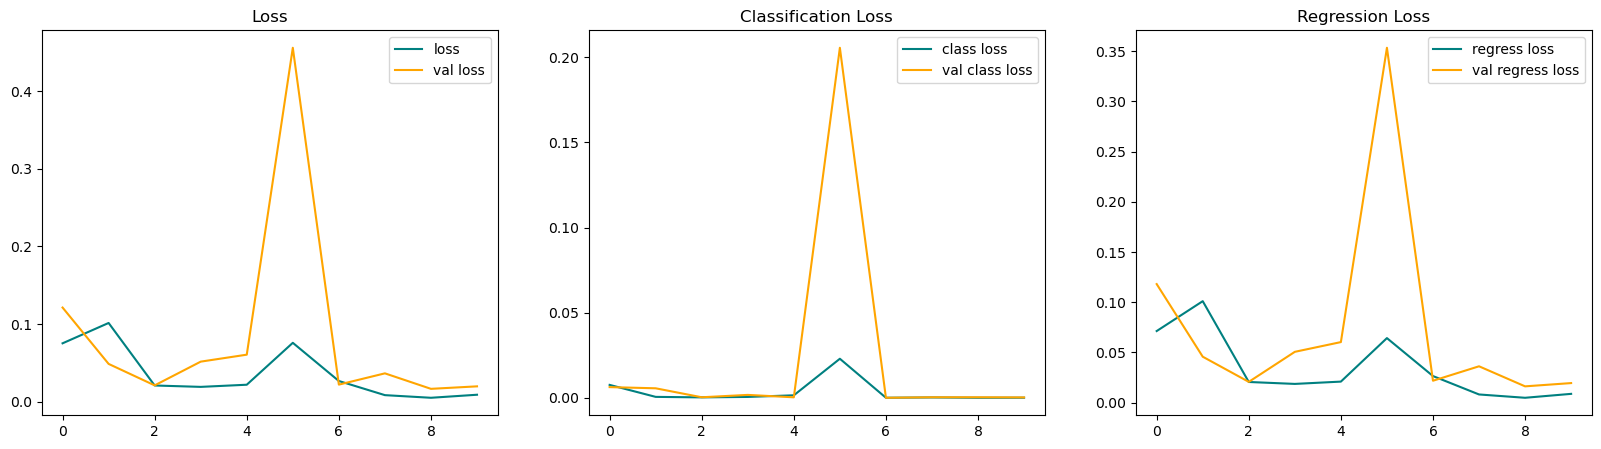

In [52]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [53]:
test_data = test.as_numpy_iterator()

In [54]:
test_sample = test_data.next()

In [55]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 194ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


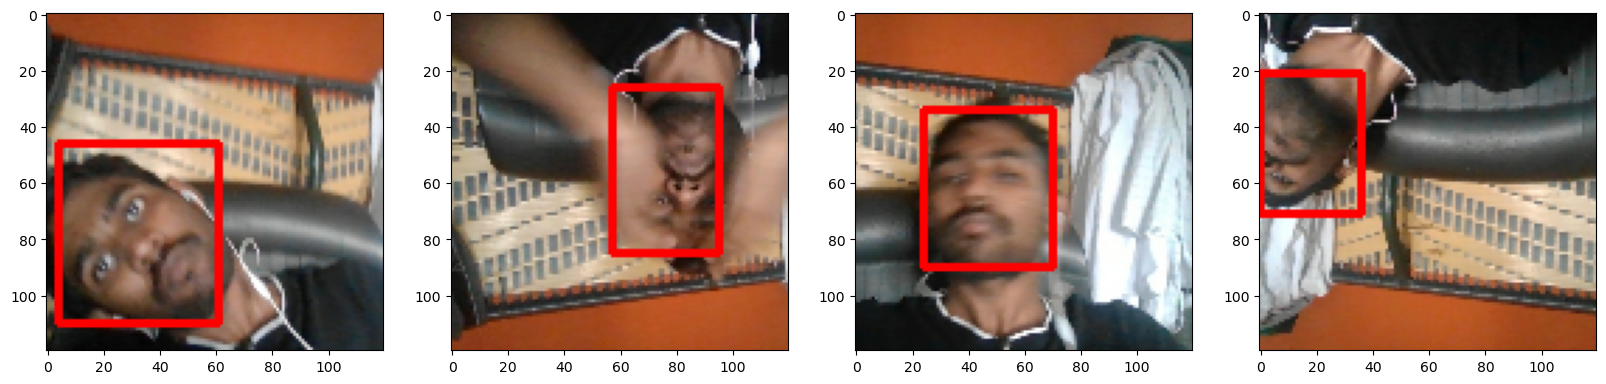

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [57]:
from tensorflow.keras.models import load_model

In [58]:
facetracker.save('facetracker.h5')

C:\Users\sange\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
facetracker = load_model('facetracker.h5')

In [61]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 94ms/step


KeyboardInterrupt: 